In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from propagator import angular_spectrum_band_limited
from skimage.restoration import unwrap_phase

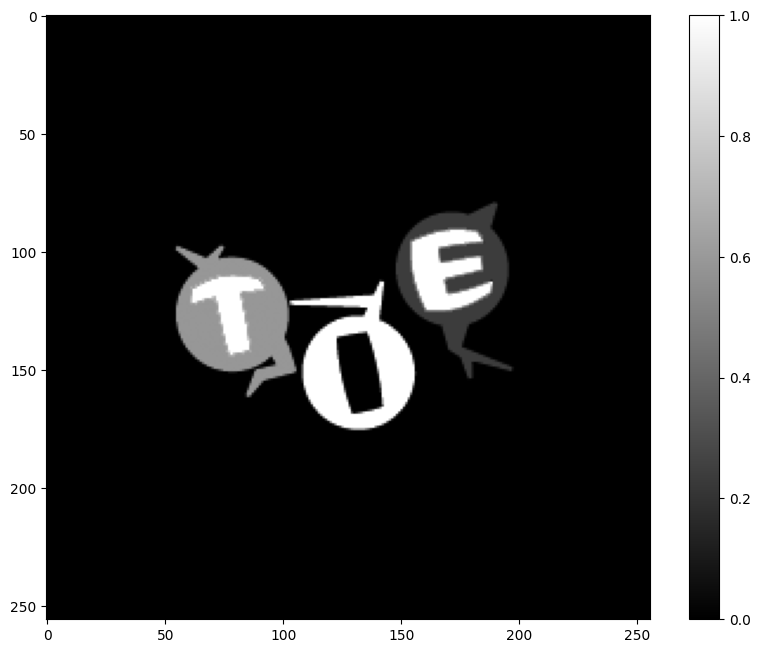

In [54]:
figure(figsize=(10, 8), dpi=100)
complex_field = np.load('../generation/fields/sci_lab_intensity_tie_phase/SCILab_intensity_TIE_Single_phase.npy')
phase = unwrap_phase(np.angle(complex_field))
plt.imshow(phase, cmap='gray')
plt.colorbar()
plt.show()

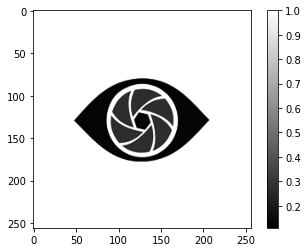

In [55]:
intensity = np.abs(complex_field) ** 2
plt.imshow(intensity, cmap='gray')
plt.colorbar()
plt.show()

In [56]:
start=-0.000001  # -1 mkm
stop=0.000001  # 1 mkm
step=0.000001  # 1 mkm

px_size = 0.000005  # 5 mkm
wavelength = 0.000000555  # 555 nm

complex_field = np.load('../generation/fields/sci_lab_intensity_tie_phase/SCILab_intensity_TIE_Single_phase.npy')

distances = np.arange(start, stop + step, step)
for distance in distances:
    wave_z = angular_spectrum_band_limited(complex_field, distance, wavelength, px_size)
    filename = f'z={distance * 1000:.3f}.npy'
    save_path = os.path.join('propagated_fields/sci_lab_intensity_tie_phase/', filename)
    np.save(save_path, wave_z)

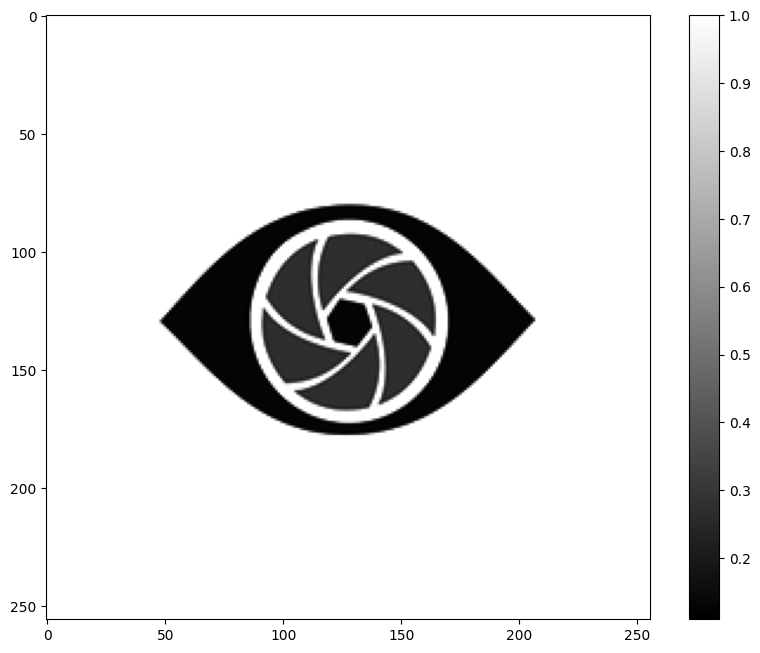

In [61]:
figure(figsize=(10, 8), dpi=100)
complex_field = np.load('propagated_fields/sci_lab_intensity_tie_phase/z=0.000.npy')
phase = unwrap_phase(np.abs(complex_field) ** 2)
plt.imshow(phase, cmap='gray')
plt.colorbar()
plt.show()

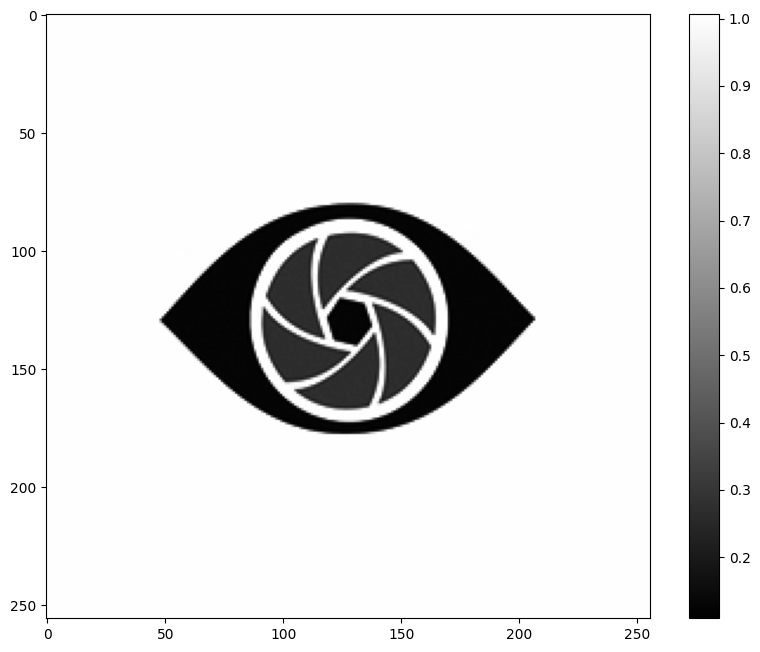

In [60]:
figure(figsize=(10, 8), dpi=100)
complex_field = np.load('propagated_fields/sci_lab_intensity_tie_phase/z=-0.001.npy')
phase = unwrap_phase(np.abs(complex_field) ** 2)
plt.imshow(phase, cmap='gray')
plt.colorbar()
plt.show()